The term customer churn refers to customers stopping their consumption of a company's services and/or products. Churn Prediction is a process whereby a model is designed to predict whether a customer is likely to churn. </br>
As opposed to the previous chapter, where the result of the prediction could've been any number; churn prediction is a <b>binary classification</b> problem where the possible outcome could either be the condition where the customer churns and the outcome where the customer won't churn.  </br>
 </br>
Once the likelihood of churning is found out, the company can then send out promotional messages including discounts and offers to the customer in order to encourge them to keep using the company's services

<b>Dataset :</b> https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer_data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataframe has wayy to many columns to fit on the screen at the same time. So we transpose the dataframe to see all the columns at once

In [3]:
pd.read_csv('Customer_data.csv').head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
#Editing the column names
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [6]:
# making the values of columns having dtypes as object to be uniform.
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [7]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Here, we can see that the column totalcharges has the dtype object even though it contains numbers. In this case pandas can be used to convert the object type into numeric type.

In [9]:
# the keyword 'coerce' is used to skip any value that cannot be converted to a numeric value
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


Some of the rows in the total charges columns are null. Filling in the null value with zero

In [11]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [12]:
df.totalcharges = df.totalcharges.fillna(0)

In [13]:
df.totalcharges.isnull().sum()

0


#### Analysing the target variable.

In [14]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

The churn variable has categorical values. However, for binary classification the model requires numerical values. We can use the astype function to convert the object type to boolean value

In [15]:
df.churn = (df.churn == 'yes').astype(int)

In [16]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

#
## Validation Framework

Using scikit learn to split the dataset into train, validation and testing groups.

In [17]:
!pip install scikit-learn

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state = 1)

train_test_split function takes in three paramenters: </br>
1. First parameter is the dataset that is to be split.
2. Second parameter is the size of the dataset that is to be set aside i.e the test set
3. Third parmeter is the random_state value which ensures the dataset is shuffled in the exact way every time the code is run.</br>
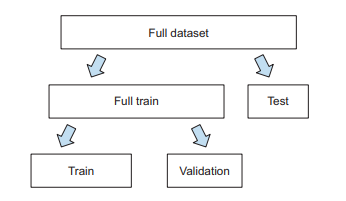

In [20]:
#Splitting the full train into train and validation datasets.

df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state=1)

In [21]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [24]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [25]:
df_train_full = df_train_full.reset_index(drop = True)

#
## Exploratory Data Analysis

In [26]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [27]:
# Checking the distribution of the target variable
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [28]:
df_train_full.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

We can see that 27% of the customers chose to stop using the company's services. This is also called the churn rate. Another way of calculating the churn rate is calculating the mean.

In [29]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

The dataset is an <b>imbalanced datset</b> because the number of users who chose not to churn is three times the number of users who chose to churn. </br></br>
A <b> balanced dataset </b> on the other hand is the dataset where both of the classes are equally distributed.

In [30]:
# Listing the categorical and numerical variables
numerical = ['tenure', 'monthlycharges','totalcharges']
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [31]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#
## Feature Importance : Churn Rate and Risk Ratio

<b>Feature Importance Analysis</b> is the process of finding out which of the variables have a greater effect on the target variable.

In [32]:
df_train_full

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


### Churn rate

In [33]:
# Calculating the global churn rate
global_mean = df_train_full.churn.mean()
round(global_mean, 2)

0.27

Finding out the churn rate for the different gender groups

In [34]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()

In [35]:
male_mean = df_train_full[df_train_full.gender =='male'].churn.mean()

In [36]:
female_mean, male_mean

(0.27682403433476394, 0.2632135306553911)

Here, it can be seen that the global mean and the mean for the male and the female groups are not very different. This means, gender is a not a useful variable when predicting churn.

Finding out the churn rate for the partner groups

In [37]:
df_train_full.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [38]:
partner_yes = df_train_full[df_train_full.partner=='yes'].churn.mean()

In [39]:
partner_no = df_train_full[df_train_full.partner=='no'].churn.mean()

In [47]:
print('Partner == yes: ', round((partner_yes- global_mean),3))
print('Partner == no: ', round((partner_no - global_mean),3))

Partner == yes:  -0.065
Partner == no:  0.06


The churn rate for customers with no partners is significantly greater than the customers with partners. This indicates that the variable partner is useful for predicting churn. 

### Risk Ratio

Risk Ratio is the ratio between the probablities in different groups, where risk refers to the risk of having the effect i.e churn. 
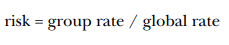

In [41]:
risk = female_mean / global_mean

In [42]:
risk

1.0253955354648652

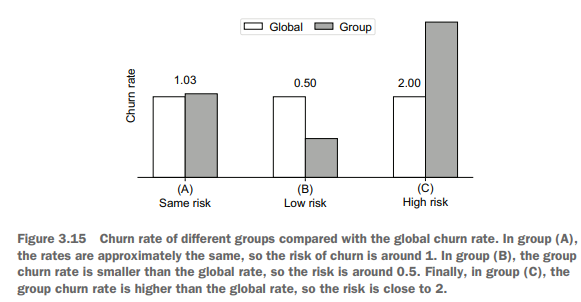

In [43]:
male_risk = male_mean / global_mean
female_risk = female_mean/global_mean

partner_yes_risk = partner_yes/global_mean
partner_no_risk = partner_no / global_mean

In [46]:
print('male: ', round(male_risk,2))
print('female: ', round(female_risk,2))

print('yes: ', round(partner_yes_risk,2))
print('no: ', round(partner_no_risk,2))

male:  0.97
female:  1.03
yes:  0.76
no:  1.22


In [58]:
from IPython.display import display

In [63]:
for c in categorical:
    print(c)
    df_group = df_train_full.groupby(by=c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


#
## Feature Importance: Mutual Information

From the above data, we get to know about the importance of categories within a variable. However, we cannot say which of the variable is the most important in predicting the target value. Mutual Information is a metric which calculates the dependency of a feature variable with the target variable. Higher dependency between the variables shows greater effect of feature variable in predicting the value of the target variable whereas variable having lower dependency aren't considered to be important. 

In [64]:
from sklearn.metrics import mutual_info_score

In [65]:
def calculate_mutual_info(series):
    return mutual_info_score(series, df_train_full.churn)

In [67]:
df_mutual_info = df_train_full[categorical].apply(calculate_mutual_info)
df_mutual_info = df_mutual_info.sort_values(ascending=False).to_frame(name = 'Mutual Information')

In [68]:
df_mutual_info

,Mutual Information
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


#
## Feature Importance : Correlation

Mutual Information can't be used as a metric to find the degree of dependence if the variables involved are numerical. To find the dependency between a binary target variable and numerical variable a method called Correlation Coefficient is used. It's value ranges from -1 to 1. 

1. Positive Correlation: when one variable goes up the other variable goes up too.
2. Zero Correlation: this shows that there is no relation between the variables.
3. Negative Correlation: when one variable goes up, the other variable goes down. 

In [71]:
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [93]:
print(df_train_full[df_train_full.tenure <=2].churn.mean())

print(df_train_full[(df_train_full.tenure > 2) & (df_train_full.tenure <=12)].churn.mean()
)
print(df_train_full[df_train_full.tenure >12].churn.mean())

0.5953420669577875
0.3994413407821229
0.17634908339788277


As the tenure goes up, the churn rate goes down since the correlation between these two variables is negative. This shows customers who have been with the company the longest are less likely to churn than customers with shorter tenure period.

In [95]:
print(df_train_full.monthlycharges.min())
print(df_train_full.monthlycharges.max())

18.25
118.65


In [98]:
print(df_train_full[df_train_full.monthlycharges <=20].churn.mean())

print(df_train_full[(df_train_full.monthlycharges > 20) & (df_train_full.tenure <=70)].churn.mean()
)
print(df_train_full[df_train_full.monthlycharges >70].churn.mean())

0.08795411089866156
0.31179596174282675
0.3594566353187043


As the monthlycharges goes up, the churn rate goes up too since the correlation between these two variables is positive. This shows customers who have higher monthly charges are more likely to churn than customers with lower monthly charges.
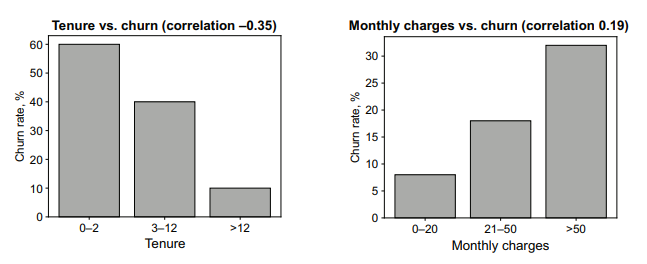